# **REFACTOR**

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [2]:
import sys
sys.path.append('/Users/juanfuentes/Documents/TEAM_11_ML_OPS/Fase_1.1_Modeling_pipeline/TEAM_11_ML_OPS')

# Loading & exploring data

In [3]:
from src.load_data import load_data
from src.explore_data import explore_data

# Category Separation

In [4]:
# Defino una funion que a partir de los numeros me crea un df a partir de una lista
def atr_list_maker(lst):
    return ['Atr' + str(valor) for valor in lst]

def df_maker(df, list):
    atr_list = atr_list_maker(list)
    atr_list.append('Class')
    #print(atr_list)
    df_new = df[atr_list].copy()
    df_new['Class'] = df_new['Class'].replace({1: 'Divorciado', 0: 'Casado'})

    return df_new

def separation_data(data):
    Communication_and_Conflict_Management = [1, 3, 4, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]
    Relationship_Harmony_and_Shared_Values = [2, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
    Emotional_Connection_and_Bonding = [5, 8, 9, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
    Dissatisfaction_and_Detachment = [6, 7, 44]
    Blame_and_Defensiveness = [48, 49, 50, 51, 52, 53, 54]
    ###
    listas_creados = {
        'Communication_and_Conflict_Management': Communication_and_Conflict_Management,
        'Relationship_Harmony_and_Shared_Values': Relationship_Harmony_and_Shared_Values,
        'Emotional_Connection_and_Bonding': Emotional_Connection_and_Bonding,
        'Dissatisfaction_and_Detachment': Dissatisfaction_and_Detachment,
        'Blame_and_Defensiveness':  Blame_and_Defensiveness
    }

    df_Communication_and_Conflict_Management = df_maker(data, Communication_and_Conflict_Management)
    df_Relationship_Harmony_and_Shared_Values = df_maker(data, Relationship_Harmony_and_Shared_Values)
    df_Emotional_Connection_and_Bonding = df_maker(data, Emotional_Connection_and_Bonding)
    df_Dissatisfaction_and_Detachment = df_maker(data, Dissatisfaction_and_Detachment)
    df_Blame_and_Defensiveness = df_maker(data, Blame_and_Defensiveness)
    ###
    dfs_creados = {
        'df_Communication_and_Conflict_Management': df_Communication_and_Conflict_Management,
        'df_Relationship_Harmony_and_Shared_Values': df_Relationship_Harmony_and_Shared_Values,
        'df_Emotional_Connection_and_Bonding': df_Emotional_Connection_and_Bonding,
        'df_Dissatisfaction_and_Detachment': df_Dissatisfaction_and_Detachment,
        'df_Blame_and_Defensiveness': df_Blame_and_Defensiveness
    }
    # Validando la creacion de los dfs
    for key_lista, lista in listas_creados.items():
        key_df = 'df_' + key_lista  # Construir la clave del DataFrame correspondiente
        df_ = dfs_creados.get(key_df)  # Obtener el DataFrame del diccionario

        if df_ is not None:
            # Imprimir el número de columnas del DataFrame y la longitud de la lista + 1
            print(f"Para df_{key_lista}:")
            print(f"Columnas en DF: {df_.shape[1]} | Valores en Lista: {len(lista)+1}" , '\n')
        else:
            print(f"No se encontró DataFrame para {key_df}.")

    return dfs_creados

# Data visualization

In [5]:
# columnas = df_Communication_and_Conflict_Management.columns
# n = len(columnas)

# for i in range(0, n, 5):
#     subset_columnas = columnas[i:i+5]
#     VIZ_DATA(df_Communication_and_Conflict_Management, subset_columnas)

def viz_data_bar_graph(df, columnas):

    fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 fila, 5 columnas
    for ax, var in zip(axes, columnas):
        counts = df.groupby([var, 'Class']).size().unstack(fill_value=0)

        counts.plot(kind='barh', stacked=True, ax=ax, color=sns.color_palette('pastel'), edgecolor='black')

        ax.set_title(f'Distribución de {var} por Clase', fontsize=14)
        ax.set_ylabel(var)  # Variable en el eje Y
        ax.set_xlabel('Count')  # Conteo en el eje X

    plt.tight_layout()
    plt.show()

# df_Communication_and_Conflict_Management

def viz_data_pairplot(data):
    custom_palette = {'Divorciado': 'orange', 'Casado': '#87CEEB'}
    sns.pairplot(data, hue='Class', palette=custom_palette)
    plt.show()
    
def heat_map(data):
    sns.heatmap(data,xticklabels=data.columns,
            yticklabels=data.columns)

# Split data for trainning

In [6]:
def shapes(df1, df2):
    print('Shape df1 ' ,df1.shape)
    print('Shape df2 ' ,df2.shape)

def data_split(data):
    X = data.drop('Class', axis=1).copy()
    y = data['Class'].copy()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


    print('Training', '-'*20)
    shapes(X_train, y_train)

    print('Validation', '-'*20)
    shapes(X_val, y_val)

    print('Test ', '-'*20)
    shapes(X_test, y_test)
    return X_train, X_test, y_train, y_test, X_val, y_val

# Data scaling

In [7]:
def scale_data(X_train, X_val, X_test):
    # STD SCALER
    scaler = StandardScaler()


    # Ajustamos y transformamos los datos de entrenamiento
    X_df_training_scaled = scaler.fit_transform(X_train)

    # Transformamos los datos de Validacion
    X_df_validation_scaled = scaler.transform(X_val)
    # Transformamos los datos de Validacion
    X_df_test_scaled = scaler.transform(X_test)
    
    return X_df_training_scaled, X_df_validation_scaled, X_df_test_scaled

In [8]:
def train_model_log_reg(X_df_training_scaled, X_df_validation_scaled, y_train, X_val, y_val):
    # Parametros para Log_Reg
    param_grid_LOG_REG = {
    'C': [0.01, 0.1, 1, 10, 100],         
    'penalty': ['l1'],                      
    'solver': ['saga', 'liblinear'],  
    'max_iter': [1000, 2000]
    }
    grid_search = GridSearchCV(LogisticRegression(), param_grid_LOG_REG, cv=5, scoring='precision')
    grid_search.fit(X_df_training_scaled, y_train)

    print("Mejores hiperparámetros encontrados:")
    print(grid_search.best_params_)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_val)

    conf_matrix = confusion_matrix(y_val, y_pred)
    print("Matriz de confusión:")
    print(conf_matrix)

    # Imprimir el reporte de clasificación
    class_report = classification_report(y_val, y_pred, zero_division=1)
    print("\nReporte de clasificación:")
    print(class_report)

    # BEST MODEL !!
    log_reg = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='saga')
    log_reg.fit(X_df_training_scaled, y_train)



    # Hacer predicciones con los datos de validación
    y_pred = log_reg.predict(X_df_validation_scaled)


    # Imprimir la matriz de confusión
    conf_matrix = confusion_matrix(y_val, y_pred)  # y_val es la verdadera etiqueta de validación
    print("Matriz de confusión:")
    print(conf_matrix)

    # Imprimir el reporte de clasificación
    class_report = classification_report(y_val, y_pred)
    print("\nReporte de clasificación:")
    print(class_report)

In [11]:
def main(datapath):
    data = load_data(datapath)
    explore_data(data)
    dframes = separation_data(data)
    columnas = dframes['df_Communication_and_Conflict_Management'].columns
    n = len(columnas)
    for i in range(0, n, 5):
        subset_columnas = columnas[i:i+5]
        viz_data_bar_graph(dframes['df_Communication_and_Conflict_Management'], subset_columnas)
    X_train, X_test, y_train, y_test, X_val, y_val = data_split(data)
    X_df_training_scaled, X_df_validation_scaled, X_df_test_scaled = scale_data(X_train, X_val, X_test)
    train_model_log_reg(X_df_training_scaled, X_df_validation_scaled, y_train, X_val, y_val)
    

verif init
     Atr1  Atr2  Atr3  Atr4  Atr5  Atr6  Atr7  Atr8  Atr9  Atr10  ...  Atr46  \
0       2     2     4     1     0     0     0     0     0      0  ...      2   
1       4     4     4     4     4     0     0     4     4      4  ...      2   
2       2     2     2     2     1     3     2     1     1      2  ...      3   
3       3     2     3     2     3     3     3     3     3      3  ...      2   
4       2     2     1     1     1     1     0     0     0      0  ...      2   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...  ...    ...   
165     0     0     0     0     0     0     0     0     0      0  ...      1   
166     0     0     0     0     0     0     0     0     0      0  ...      4   
167     1     1     0     0     0     0     0     0     0      1  ...      3   
168     0     0     0     0     0     0     0     0     0      0  ...      3   
169     0     0     0     0     0     0     0     1     0      0  ...      3   

     Atr47  Atr48  Atr49  At

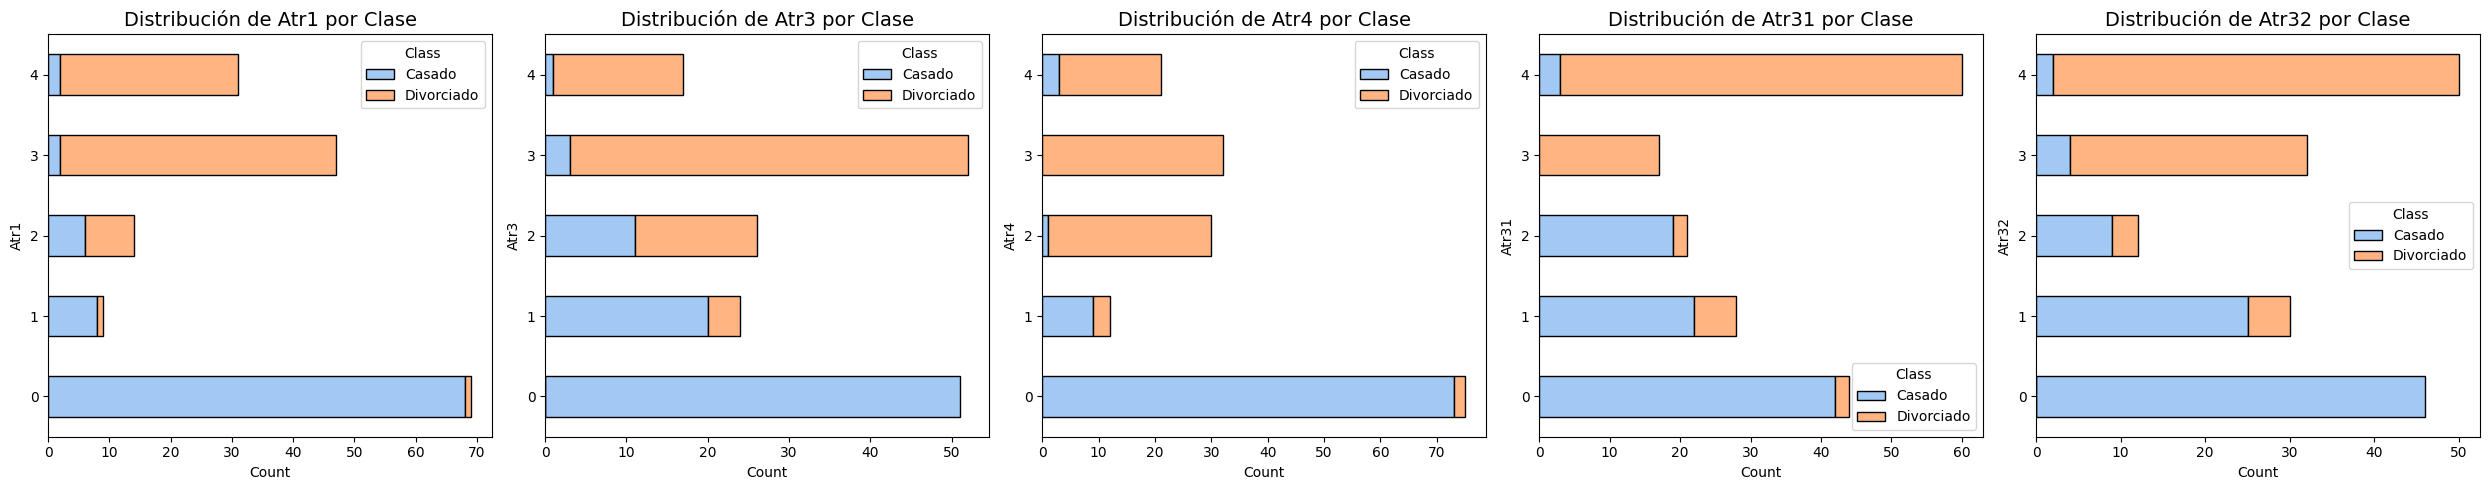

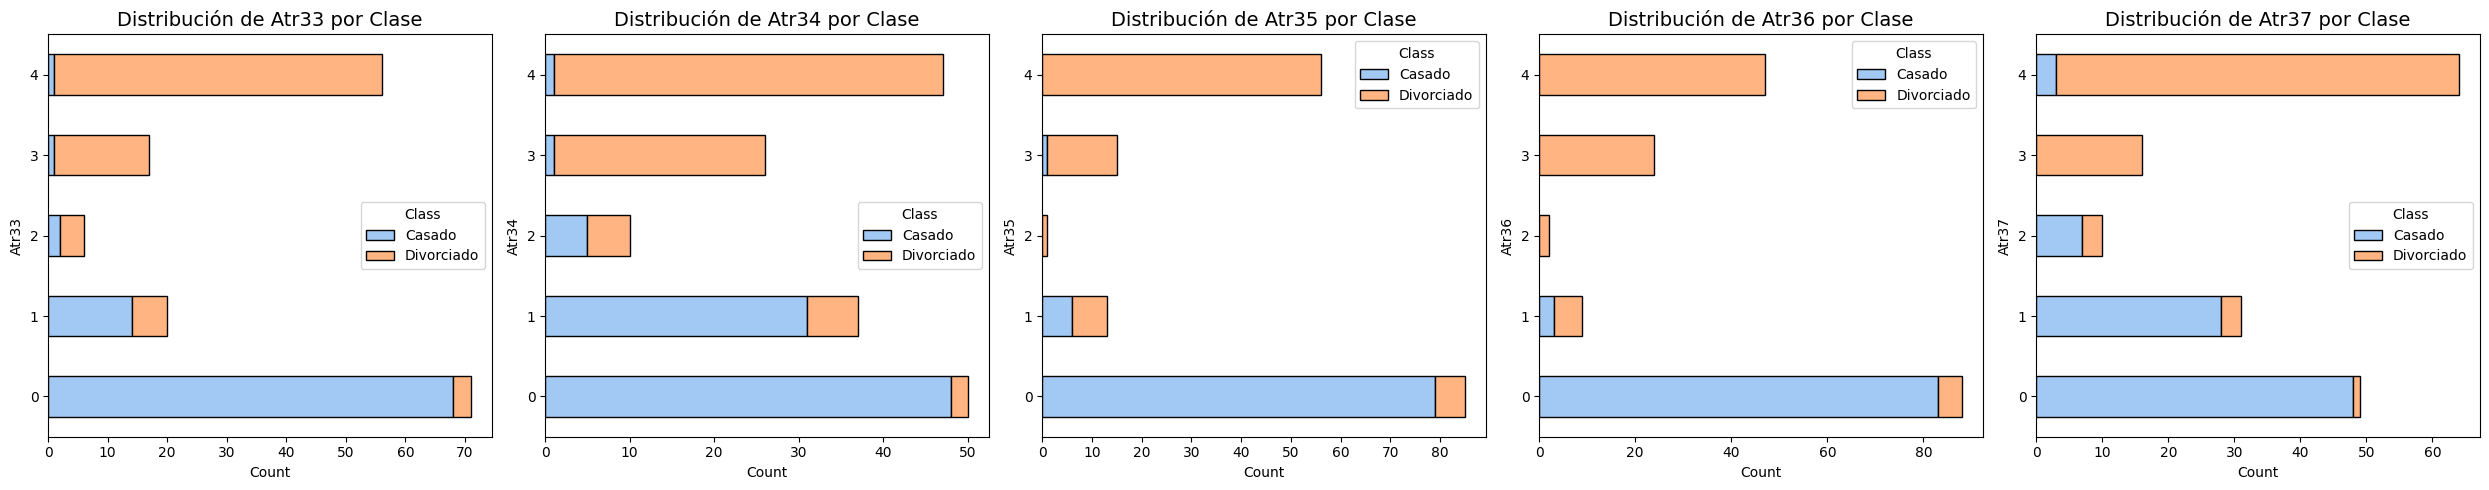

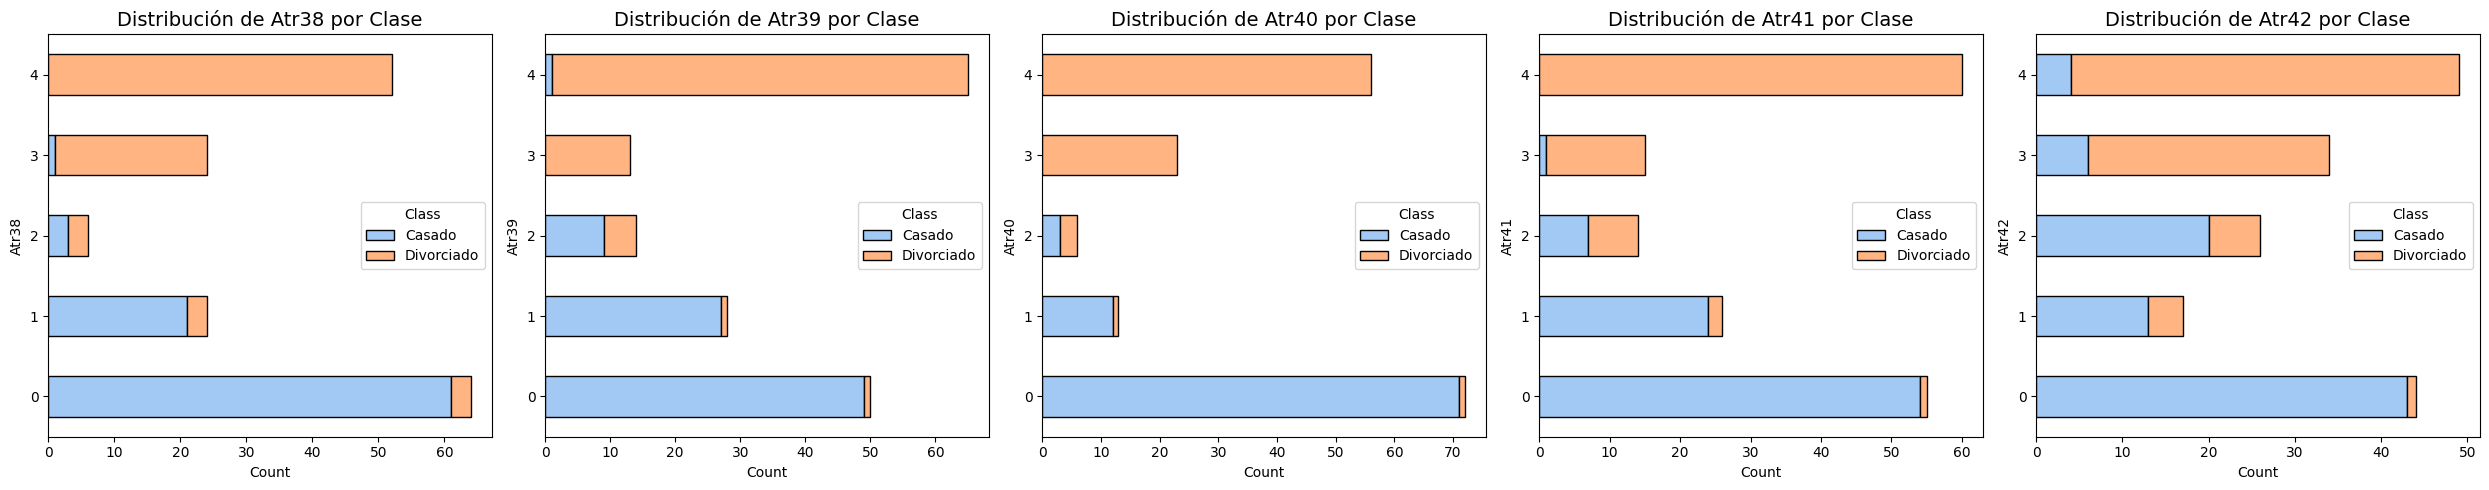

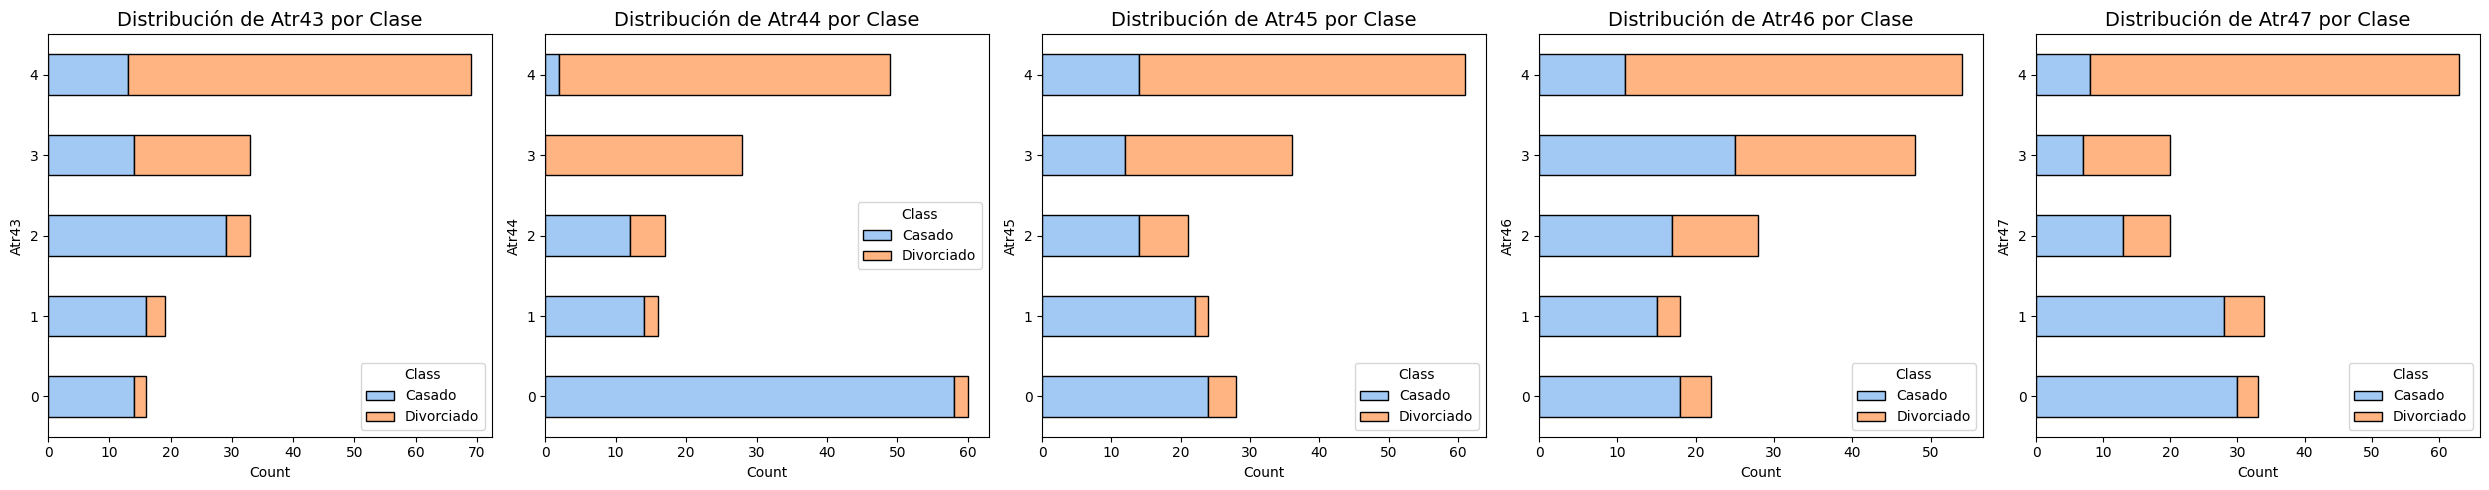

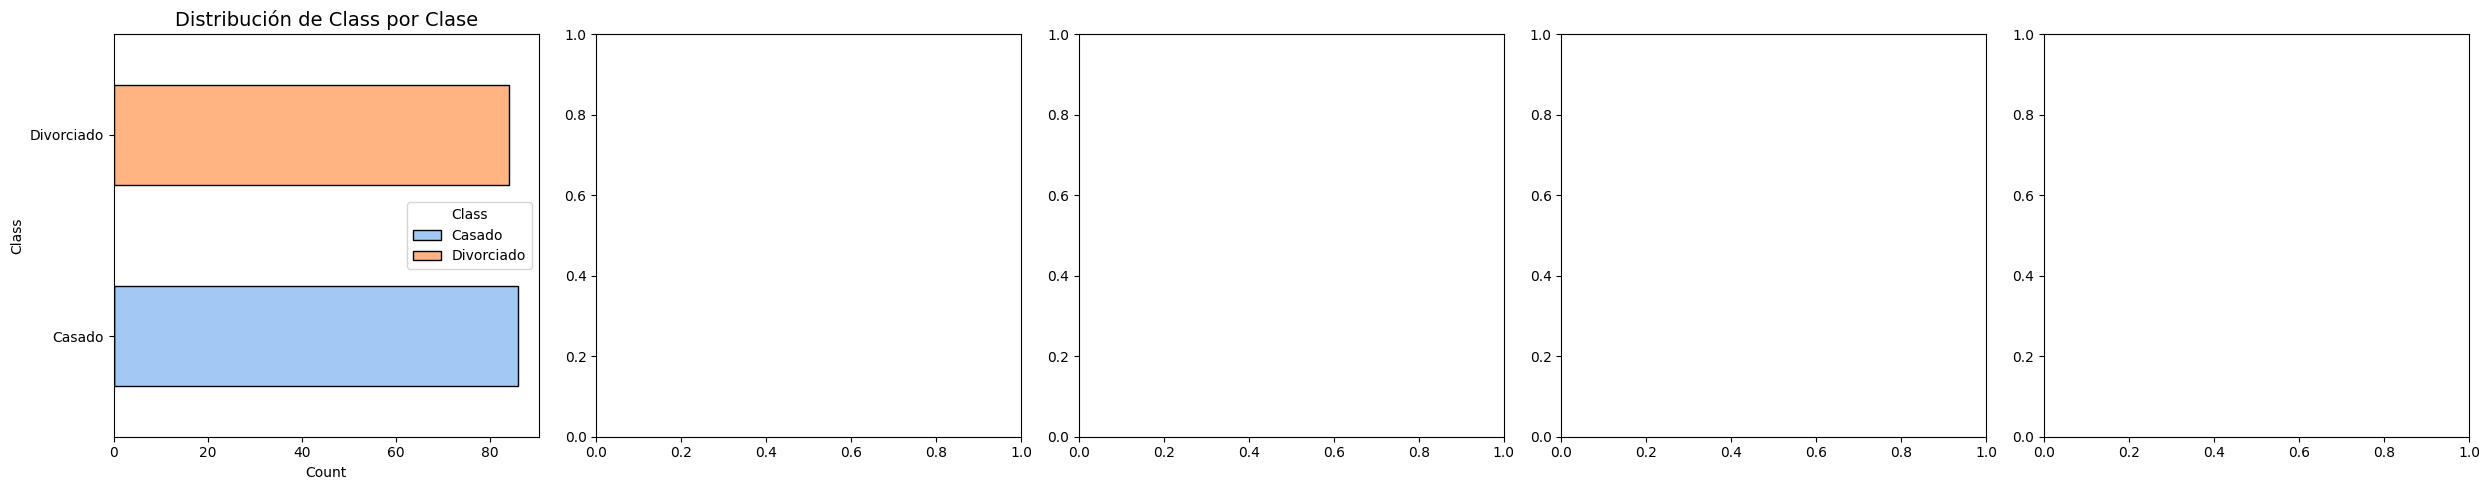

Training --------------------
Shape df1  (136, 54)
Shape df2  (136,)
Validation --------------------
Shape df1  (17, 54)
Shape df2  (17,)
Test  --------------------
Shape df1  (17, 54)
Shape df2  (17,)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Mejores hiperparámetros encontrados:
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
Matriz de confusión:
[[ 2  1]
 [ 0 14]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.93      1.00      0.97        14

    accuracy                           0.94        17
   macro avg       0.97      0.83      0.88        17
weighted avg       0.95      0.94      0.94        17

Matriz de confusión:
[[ 3  0]
 [ 1 13]]

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.93      0.96        14

    accuracy                           0.94        17
   macro avg       0.88      0.96      0.91        17
weighted avg       0.96      0.94      0.94        17



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [12]:
main('../../../Fase_1_Avance_Proyecto/DATA/divorce.csv')